# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

# Import Dataset

##### Tesla Stock Price data from Jan 1,2010 to Dec 31st,2017 except weekends and holidays

In [2]:
cd D:\s6\software engineering\finakl


D:\s6\software engineering\finakl


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")


# Understanding the data


In [4]:
df.head(10)


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [5]:
df.info

<bound method DataFrame.info of             Date    Open    High     Low    Last   Close  \
0     2018-10-08  208.00  222.25  206.85  216.00  215.15   
1     2018-10-05  217.00  218.60  205.90  210.25  209.20   
2     2018-10-04  223.50  227.80  216.15  217.25  218.20   
3     2018-10-03  230.00  237.50  225.75  226.45  227.60   
4     2018-10-01  234.55  234.60  221.05  230.30  230.90   
...          ...     ...     ...     ...     ...     ...   
1230  2013-10-14  160.85  161.45  157.70  159.30  159.45   
1231  2013-10-11  161.15  163.45  159.00  159.80  160.05   
1232  2013-10-10  156.00  160.80  155.85  160.30  160.15   
1233  2013-10-09  155.70  158.20  154.15  155.30  155.55   
1234  2013-10-08  157.00  157.80  155.20  155.80  155.80   

      Total Trade Quantity  Turnover (Lacs)  
0                4642146.0         10062.83  
1                3519515.0          7407.06  
2                1728786.0          3815.79  
3                1708590.0          3960.27  
4                

In [6]:
df.isnull().sum() 

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [7]:
correlation=df.corr()
correlation

C:\Users\laxmi\AppData\Local\Temp\ipykernel_10972\3471529324.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.998956,0.998776,0.997662,0.997704,0.367503,0.587026
High,0.998956,1.000000,0.998728,0.999130,0.999159,0.388798,0.605907
Low,0.998776,0.998728,1.000000,0.999008,0.999065,0.361695,0.582446
Last,0.997662,0.999130,0.999008,1.000000,0.999963,0.381269,0.599575
Close,0.997704,0.999159,0.999065,0.999963,1.000000,0.380801,0.599155
Total Trade Quantity,0.367503,0.388798,0.361695,0.381269,0.380801,1.000000,0.941976
Turnover (Lacs),0.587026,0.605907,0.582446,0.599575,0.599155,0.941976,1.000000


# Dimensions of dataset

In [8]:
df.shape


(1235, 8)

# Statistical summary

In [9]:
df.describe()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


# Data Visualizatoin

##### Analyze how prices of the stock have moved over the period of time and how the end of the quarters affects the prices of the stock.

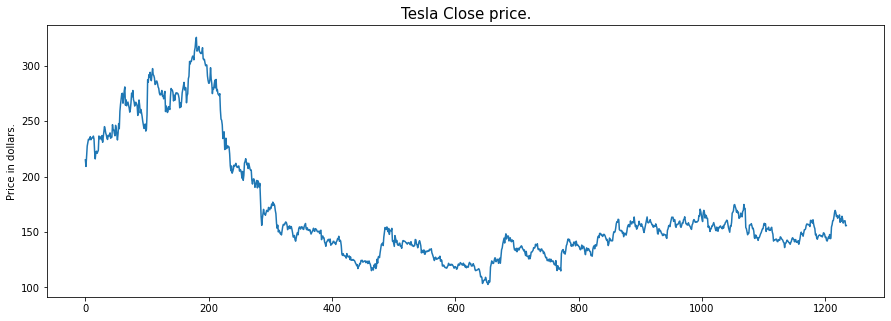

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [13]:
df["Date"]


0       2018-10-08
1       2018-10-05
2       2018-10-04
3       2018-10-03
4       2018-10-01
           ...    
1230    2013-10-14
1231    2013-10-11
1232    2013-10-10
1233    2013-10-09
1234    2013-10-08
Name: Date, Length: 1235, dtype: object

In [16]:
df.isnull().sum()


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Distribution plot

C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

ValueError: num must be 1 <= num <= 6, not 7

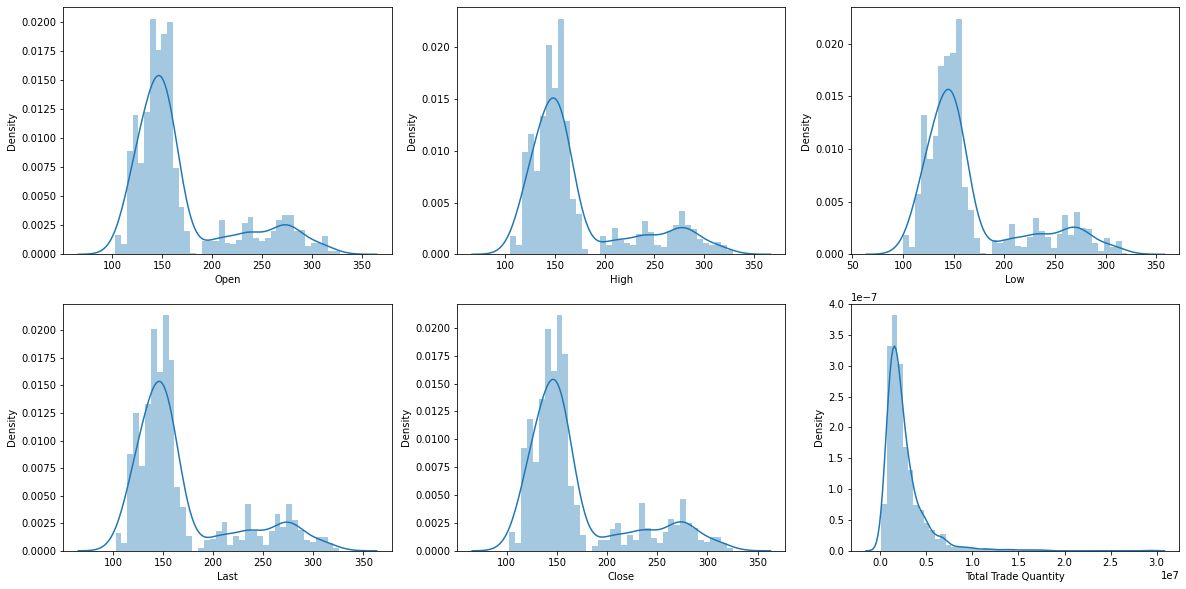

In [59]:
features = ['Open', 'High', 'Low','Last', 'Close','Total Trade Quantity','Turnover (Lacs)']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


##### we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\laxmi\anaconda3\lib\si

ValueError: num must be 1 <= num <= 6, not 7

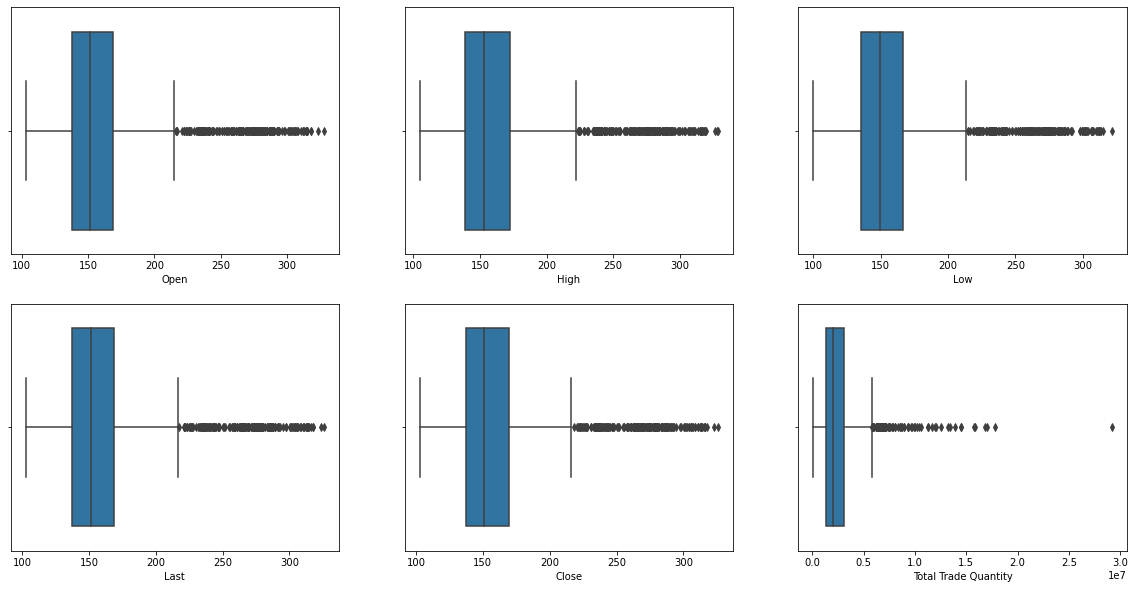

In [60]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


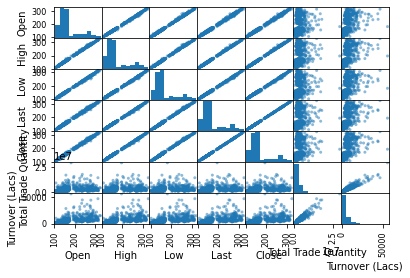

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

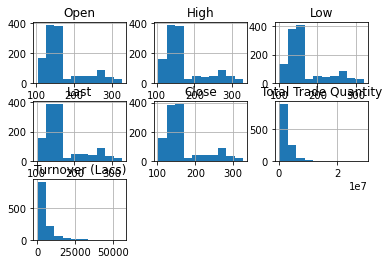

In [20]:
df.hist()
plt.show()

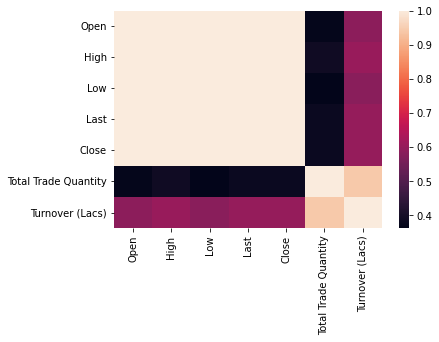

In [21]:
sb.heatmap(correlation)
plt.show()

##### volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

# Feature Enginnering

##### Deriving day,month,year column

In [22]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,8,10,2018
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,5,10,2018
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,4,10,2018
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,3,10,2018
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,1,10,2018


In [23]:
df["day"]

0        8
1        5
2        4
3        3
4        1
        ..
1230    14
1231    11
1232    10
1233     9
1234     8
Name: day, Length: 1235, dtype: int32

# Quarterly results

In [24]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year,is_quarter_end
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,8,10,2018,0
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,5,10,2018,0
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,4,10,2018,0
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,3,10,2018,0
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,1,10,2018,0


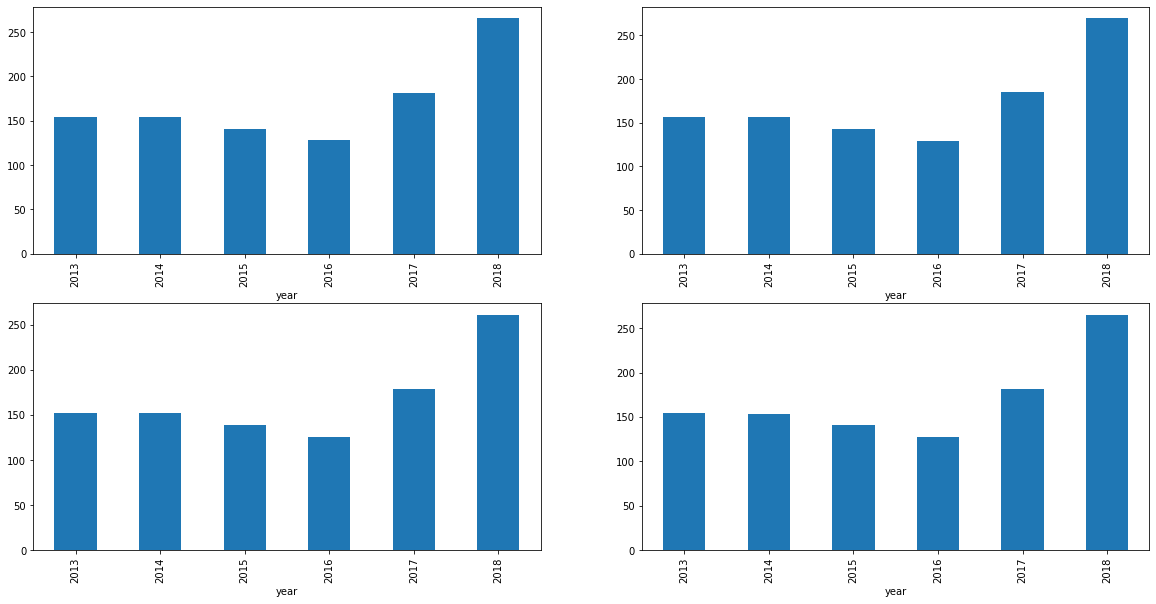

In [25]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


##### We can conclude stock prices have doubled from year 2013 to 2014

In [26]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year
is_quarter_end,,,,,,,,,,
0,169.356916,171.816585,166.733782,169.049266,169.035251,2.614783e+06,4878.112815,15.839657,5.987760,2015.801714
1,168.169019,170.671651,165.754426,168.124761,168.136483,2.583370e+06,4774.862344,15.645933,7.521531,2015.712919


##### Prices are higher in the months which are quarter end as compared to that of the non-quarter end months. The volume of trades is lower in the months which are quarter end.

# We have added the target feature which is a signal whether to buy or not we will train our model to predict this only

In [27]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),day,month,year,is_quarter_end,open-close,low-high,target
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,8,10,2018,0,-7.15,-15.40,0
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,5,10,2018,0,7.80,-12.70,1
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,4,10,2018,0,5.30,-11.65,1
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,3,10,2018,0,2.40,-11.75,1
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,1,10,2018,0,3.65,-13.55,1


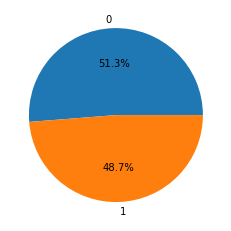

In [28]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()


##### As our concern is with the highly correlated features only so, we will visualize our heatmap as per that criteria only.

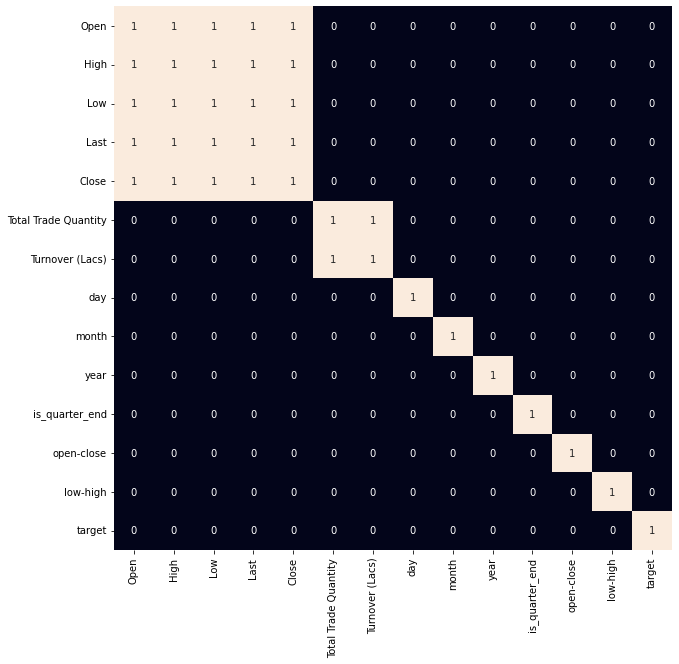

In [29]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


##### This heatmap shows new added columns are not highly correlated

# Data Splitting and Normalization

In [30]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1111, 3) (124, 3)


In [31]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)
print("Train Set Size: ",X_train.shape,Y_train.shape)
print("Test Set Size: ",x_test.shape,y_test.shape)

Train Set Size:  (988, 3) (988,)
Test Set Size:  (247, 3) (247,)


# Learning algorithms

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from math import sqrt

# Linear regression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred_lr= lr_model.predict(x_test)
y_pred_lr

array([ 0.42120666,  0.29710381,  0.79170833,  0.45855278,  0.24013884,
        0.45465373,  0.87533026,  0.45390369,  0.62757591, -0.2040779 ,
        0.24779237,  0.69993969,  0.55568193,  0.59252068,  0.49864965,
        0.89366195,  0.62168147,  0.32808674,  0.75547294,  0.4152031 ,
        1.39531664,  0.39815644,  0.4416815 ,  0.41788229,  0.34541257,
        0.25739736,  0.4797401 ,  0.5192988 ,  0.44097114,  0.296741  ,
        0.28687914,  0.1993316 ,  0.62457572,  1.88166852,  0.44339771,
        0.60131151,  0.20522817, -0.11084991,  0.65677638,  0.46901907,
        0.52101395,  0.52808962,  1.16221425,  0.52673621,  0.76826981,
        0.56318559,  0.43685809,  0.17703356,  0.48428538,  0.53080956,
        0.79031523,  0.08897972,  0.30488983,  0.46151541,  0.45293858,
        0.23899836,  0.37489435,  0.69608033,  0.35559649,  0.39665528,
        0.70658737,  0.49785779, -0.04670228,  0.39519488,  0.256794  ,
        0.74672181,  0.29088518, -0.36874318,  0.45801779,  0.43

In [35]:
print("Coefficients : \n",lr_model.coef_)

Coefficients : 
 [ 0.30683502 -0.03444536 -0.00652505]


In [36]:
print("Intercept: \n",lr_model.intercept_)

Intercept: 
 0.49332002538450265


In [37]:
mse_lr = mean_squared_error(y_test,y_pred_lr)
print("Mean Square Error from Linear Regression is ",mse_lr)
r2_lr = r2_score(y_test,y_pred_lr)
print("r2 score : ",r2_lr)
rmse_lr = sqrt(mse_lr)
print("Root Mean Square Error is : ",rmse_lr)
mae_lr = mean_absolute_error(y_test,y_pred_lr)
print("Mean absolute error : ",mae_lr)

Mean Square Error from Linear Regression is  0.1487355510537949
r2 score :  0.3978628245360999
Root Mean Square Error is :  0.38566248333717257
Mean absolute error :  0.3555905900079101


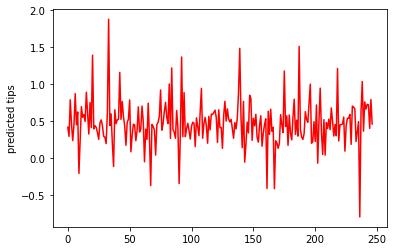

In [38]:
plt.plot(y_pred_lr,label="predictions",color="red")
plt.ylabel("predicted tips")
plt.show()

# SVM

In [39]:
from sklearn.svm import SVR

In [40]:
svm_model = SVR()
svm_model.fit(X_train,Y_train)
y_pred_svm=svm_model.predict(x_test)
y_pred_svm

array([ 0.22337588, -0.00776759,  1.08520518,  0.38603981, -0.06725962,
        0.35420767,  1.07907226,  0.34265066,  0.99540938,  0.08253989,
        0.24943589,  1.11156285,  0.75166967,  0.83343022,  0.48794928,
        1.09303378,  0.83723574,  0.05391033,  1.08893974,  0.20193581,
        0.91474645,  0.13796768,  0.31690033,  0.20916239,  0.00662788,
       -0.09169602,  0.4474682 ,  0.60933072,  0.3150656 , -0.10753055,
       -0.05102071, -0.13034791,  0.87284591,  0.88219321,  0.3006018 ,
        0.86030049, -0.1039681 ,  0.0607583 ,  1.02360375,  0.42013666,
        0.62210566,  0.64473916,  0.99664988,  0.67845215,  1.12735057,
        0.82132193,  0.27603942, -0.07715547,  0.45485109,  0.70401935,
        1.08374993, -0.00228073, -0.02283932,  0.37069209,  0.34360631,
       -0.06763277,  0.09315976,  1.10498639,  0.00534452,  0.14244755,
        1.05521006,  0.52089961,  0.09573903,  0.17279122, -0.07173843,
        1.09291988, -0.0342771 ,  0.12612265,  0.42291626,  0.25

In [41]:
mse_svm=mean_squared_error(y_pred_svm,y_test)
print("Mean Square Error from SVM is ",mse_svm)
mae_svm = mean_absolute_error(y_pred_svm,y_test)
print("Mean absolute error from SVM is",mae_svm)
r2_svm = r2_score(y_test,y_pred_svm)
print("r2 score : ",r2_svm)
rmse_svm = sqrt(mse_svm)
print("Root Mean Square Error is : ",rmse_svm)

Mean Square Error from SVM is  0.08323394231983137
Mean absolute error from SVM is 0.2034740251235668
r2 score :  0.6630378508964437
Root Mean Square Error is :  0.2885029329484041


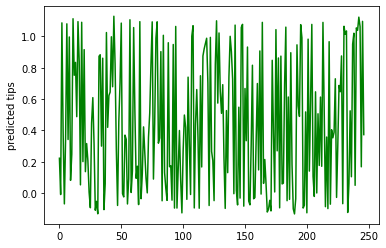

In [42]:
plt.plot(y_pred_svm,label="predictions",color="green")
plt.ylabel("predicted tips")
plt.show()

# knn

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
rmse_val = [] #to store rmse values for different k
kn = 10
nums=[]
for i in range(1,10):
    nums.append(i)    
for K in nums:
    model = KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
print(rmse_val)

[0.45883146774112354, 0.3710145844334804, 0.3353515152439724, 0.3248325635338671, 0.3111946420861996, 0.31654767279163115, 0.3191795232169219, 0.31161311396268654, 0.31059014282026726]


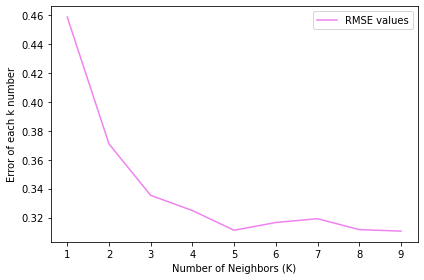

In [45]:
plt.plot(range(1,kn),rmse_val,color="violet")
plt.legend(['RMSE values'])
plt.ylabel('Error of each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [46]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
grid_search = GridSearchCV(KNeighborsRegressor(),params,cv=5)
grid_search.fit(X_train,Y_train)
grid_search.best_params_

{'n_neighbors': 9}

In [47]:
max_k_neighbor = 4

neigh = KNeighborsRegressor(max_k_neighbor+1)
neigh.fit(X_train,Y_train)
neigh

KNeighborsRegressor()

# RFR

In [48]:
from sklearn.ensemble import RandomForestRegressor
RFR_model= RandomForestRegressor()
RFR_model.fit(X_train, Y_train)
y_pred_RFR= RFR_model.predict(x_test)
y_pred_RFR

array([0.        , 0.05      , 1.        , 0.43      , 0.25      ,
       0.6       , 1.        , 0.06      , 0.97      , 0.        ,
       0.04      , 1.        , 0.95      , 0.92      , 0.45      ,
       1.        , 0.88      , 0.02      , 1.        , 0.        ,
       1.        , 0.02      , 0.78      , 0.29      , 0.01      ,
       0.        , 0.29      , 0.61      , 0.77      , 0.02      ,
       0.36      , 0.        , 0.41      , 1.        , 0.        ,
       0.95      , 0.        , 0.29      , 0.87      , 0.33      ,
       0.95      , 0.43      , 1.        , 0.56      , 1.        ,
       0.77      , 0.09      , 0.2       , 0.71      , 0.85      ,
       1.        , 0.        , 0.17      , 0.0275    , 0.73      ,
       0.        , 0.06      , 1.        , 0.04      , 0.17      ,
       0.99      , 0.66      , 0.01      , 0.33      , 0.        ,
       1.        , 0.09      , 0.        , 0.19      , 0.1       ,
       0.25      , 0.01      , 0.57      , 0.49      , 0.52   

In [49]:
mse_RFR=mean_squared_error(y_pred_RFR,y_test)
print("Mean Square Error from RFR is ",mse_RFR)
mae_RFR = mean_absolute_error(y_pred_RFR,y_test)
print("Mean absolute error from RFR is",mae_RFR)
r2_RFR = r2_score(y_test,y_pred_RFR)
print("r2 score : ",r2_RFR)
rmse_RFR = sqrt(mse_RFR)
print("Root Mean Square Error is : ",rmse_RFR)

Mean Square Error from RFR is  0.11706569480707263
Mean absolute error from RFR is 0.21056766917293232
r2 score :  0.5260742551768617
Root Mean Square Error is :  0.3421486443157018


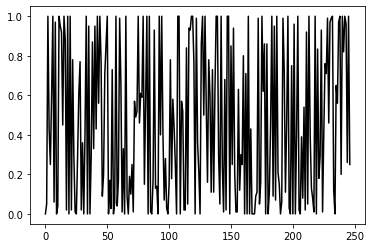

In [50]:
plt.plot(y_pred_RFR,label="predictions",color="black")
plt.show()

# Comparing Models

In [51]:
data={
    "Model":["Linear Regression","SVM","Random Forest Regressor"],
    "RMSE":[rmse_lr,rmse_svm,rmse_RFR],
    "MSE":[mse_lr,mse_svm,mse_RFR],
    "MAE":[mae_lr,mae_svm,mse_RFR],
    "r2 score":[r2_lr,r2_svm,r2_RFR]
}
error_df = pd.DataFrame(data)
error_df

,Model,RMSE,MSE,MAE,r2 score
0,Linear Regression,0.385662,0.148736,0.355591,0.397863
1,SVM,0.288503,0.083234,0.203474,0.663038
2,Random Forest Regressor,0.342149,0.117066,0.117066,0.526074


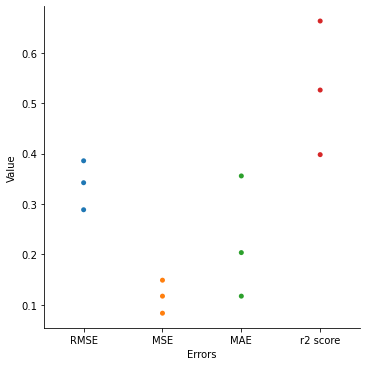

In [52]:
sb.catplot(data=error_df,kind="swarm")
plt.xlabel("Errors")
plt.ylabel("Value")
plt.show()

In [53]:
model_scores={"KNN":neigh.score(x_test,y_test),"SVM":svm_model.score(x_test,y_test),"Linear Regression":lr_model.score(x_test,y_test),"Random Forest Regressor":RFR_model.score(x_test,y_test)}
model_scores

{'KNN': 0.6079469143994691,
 'SVM': 0.6630378508964437,
 'Linear Regression': 0.3978628245360999,
 'Random Forest Regressor': 0.5260742551768617}

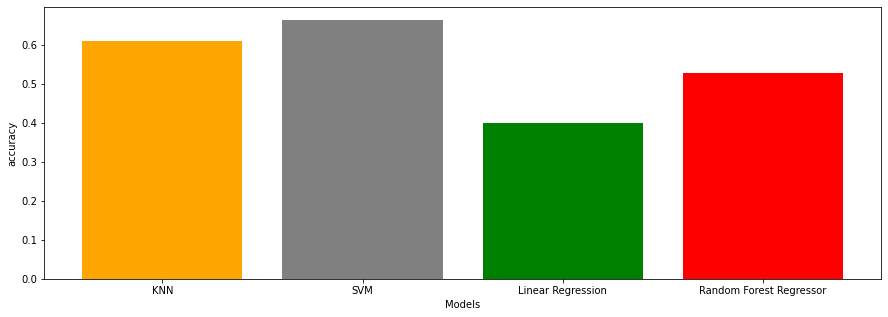

In [54]:
plt.figure(figsize=(15,5))
plt.bar(*zip(*model_scores.items()),color=["orange","grey","green","red"])
plt.xlabel("Models")
plt.ylabel("accuracy")
plt.show()

In [55]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

LogisticRegression() : 
Training Accuracy :  0.935580169813795
Validation Accuracy :  0.9078256302521008
SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.9338222036454236
Validation Accuracy :  0.8999474789915967
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy 

C:\Users\laxmi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


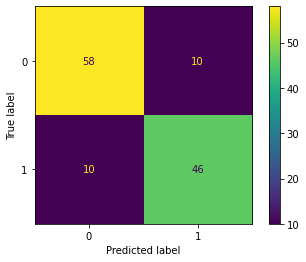

In [56]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()


# Backend for LSTM model


In [ ]:
#pandas used to load dataset and analyse
#numpy for mathematical techniques
import pandas as pd
import numpy as np

#matplotlib for plotting graphs
import matplotlib.pyplot as plt
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

#we have to scale the values then give to algo using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

df=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
df.head()

#conversion of date format
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

#fixing height and width of graph for close column
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')



#long short term memory recural neural network has ability to remember previous thing
#droupout used to solve overfitting problem
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

#sorting the index column i.e. date column
data=df.sort_index(ascending=True,axis=0)
#creating new df
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

#transfering date and close data into new df
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["Close"][i]
    

#setting index col as date col                                                  
# new_dataset.index=new_dataset.Date
#dropping date col 
new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)

final_dataset=new_dataset.values

train_data=final_dataset[0:987,:]
valid_data=final_dataset[987:,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

lstm_model.save("saved_lstm_model.h5")
 
print("model saved")


# Frontend for LSTM model


In [ ]:
import numpy as np
import pandas as pd
#for storing and getting data from database
import pymysql
pymysql.install_as_MySQLdb()
import MySQLdb
import warnings
warnings.filterwarnings("ignore")
username_list=[]
password_list=[]
username_list1=[]
password_list1=[]
import tensorflow as tf
#load .h file
from keras.models import Sequential
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from flask import Flask,request,jsonify,render_template
#flask is a python web framer
model=load_model("saved_lstm_model.h5")
data_user=pd.read_csv("NSE-Tata-Global-Beverages-Limited.csv")
updated_date=[]
updated_close=[]
 #initializing flask
app=Flask(__name__)
@app.route('/')
def home():
    return render_template('register.html')
@app.route('/register',methods=['POST','GET'])
#collecting data in register method
def register():
    int_features2=[str(x) for x in request.form.values()]
    r1=int_features2[0]
    print(r1)
    r2=int_features2[1]
    print(r2)
    username=int_features2[0]
    passw1=int_features2[1]
    import MySQLdb
    conn = MySQLdb.connect(db='base', user='root', passwd='pwd', host='localhost')

    cursor=db.cursor()
    cursor.execute("SELECT user FROM user_register")
    result1=cursor.fetchall()
    for row1 in result1:
        print(row1)
        print(row1[0])
        username_list1.append(str(row1[0]))
    print(username_list1)
    if username in username_list1:
        return render_template('register.html',text='This username is already in use')
    else:
        sql="INSERT INTO user_register(user,passsword) values (%s,%s)"
        val=(r1,r2)

        try:
            cursor.execute(sql,val)
            db.commit()
        except:
            db.rollback()
        db.close()
        return render_template('register,html',text="SUCCESSFULLY REGISTERED")   
@app.route('/login')
def login():
    return render_template('login.html')
@app.route('/logedin',methods=['POST','GET'])
def logedin():
    int_features3=[str(x) for x in request.form.values()]
    print(int_features3)
    logu=int_features3[0]
    passw=int_features3[1]
    import MySQLdb

    db=MySQLdb.connect('localhost',"root","","ddbb")

    cursor=db.cursor()
    cursor.execute("SELECT user from user_register")
    result1=cursor.fetchall()
    for row2 in result1:
        print(row2)
        print(row2[0])
        username_list.append(str(row2[0]))
    print(username_list)
    cursor1=db.cursor()
    cursor1.execute("SELECT user from user_register")
    result2=cursor1.fetchall()
    for row3 in result2:
        print(row3)
        print(row3[0])
        username_list.append(str(row3[0]))
    print(username_list)
    print(username_list.index(logu))
    print(username_list,index(passw))   
    if username_list.index(logu)==password_list.index(passw):
        return render_template('index1.html')
    else:
        return render_template('login.html',text='use proper username and passwored')
@app.route('/production')
def production():
    return render_template('index.html')
@app.route('/production/predict',methods=['POST','GET'] )
def predict():   
    #for rendering results on html gui     
    int_features=[str(x) for x in request.form.values()]
    a=int_features
    print(str(a[0]))
    date_required=str(a[0])
    print(data_user)
    updated_date.append(date_required)
    print(date_required)
    print(updated_date)
    value=data_user.loc[data_user['Date']==date_required,'Close'].iloc[0]
    row_index=data_user[data_user['Date']==date_required].index[0]
    print("value,row index values of that particular location",value,row_index)
    close_value_list=list(data_user['Close'])
    print(close_values_list[row_index-121:row_index])        
    new_user_input=close_values_list[row_index-121:row_index]
    print(len(new_user_input))
    user_df=pd.DataFrame(np.array([new_user_input]).T)
    user_df.columns=['close']
    user_df
    dataset2=user_df.values
    dataset2
    scaler=MinMaxScaler(feature_range=(0,1))
    scaled_data=scaler_fit_transform(dataset2)
    inputs=user_df.values
    inputs=inputs.reshape(-1,1)
    inputs=scaler.transform(inputs)
    print(inputs)
    print(len(inputs))
    X_test=[]
    print(inputs.shape[0])
    for i in range(120,inputs.shape[0]):
        X_test.append(inputs[0:i,0])
    X_test=np.array(X_test)
    print(X_test)
    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
    with graph.as_default():
        closing_price=model.predict(X_test)
    closing_price=scaler.inverse_transform(closing_price) 
    print("The predicted result is",closing_price[0][0])       
    del X_test
    del inputs
    del value,row_index
    output=closing_price[0][0]
    data_user.loc[data_user['Date']==date_required,'Close']=output
    print(data_user)
    print("updates the close value",data_user.loc[data_user['Date']==date_required,'Close'].iloc[0])
    return render_template('index1.html',prediction_text='the closing value on () qill be ()'.format(date_required,output))
if __name__=='__main__':
    app.run(debug=True)
    app.run()